In [1]:
import os
import sys
import warnings


sys.path.append(os.path.abspath('../scripts'))
warnings.filterwarnings('ignore')


In [2]:
import sales_analysis as sa
import chi_squaredAnlaysis as chi
import customur_during_before_and_after_holiday_analysis as bda

In [3]:
path = ['../data/train.csv' , '../data/test.csv']
train , test  = sa.load_data(path)

2024-09-20 10:18:54,781 - root - INFO - data loading started


In [4]:
train.shape

(1017209, 10)

## Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

### i used chi-squared analysis

2024-09-20 10:18:55,580 - root - INFO - check for distribution and plot
2024-09-20 10:18:55,595 - root - INFO - distribution calcualted sucessfully
2024-09-20 10:18:55,633 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 10:18:55,642 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 10:18:55,680 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 10:18:55,686 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all

train promo distribution : Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64
test promo distribution: Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64


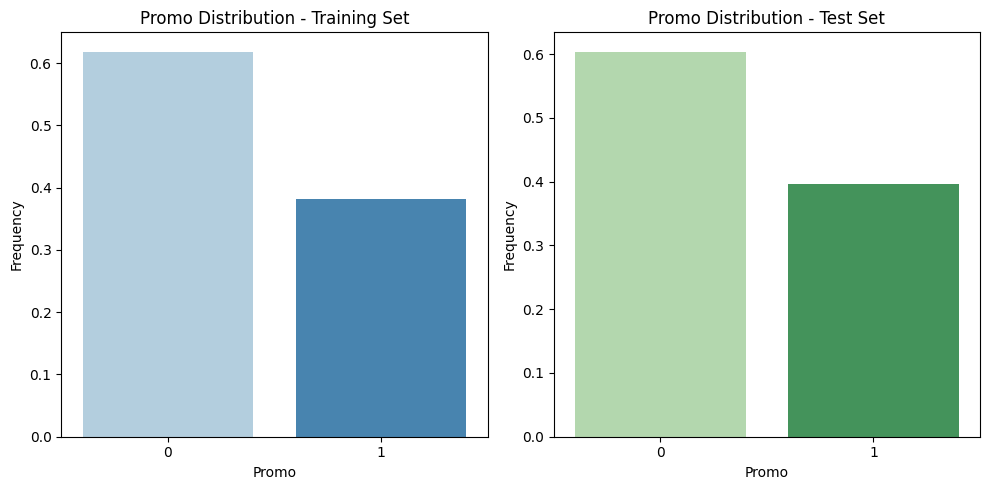

In [5]:
chi.check_for_distribution_and_plot(train,test)

## we can see that it is alsmost have the same distribution

In [6]:
chi.chi_square_test(train,test)

2024-09-20 10:18:55,927 - root - INFO - working on Statistical Test - Chi-Squared Test


Chi-Squared Test Statistic: 0.0008573242970804401
P-Value: 0.9766411974374951
The Promo distributions are similar.


#### The Promo distributions are similar.
#### 2024-09-19 18:02:26,377 - root - INFO - working on Statistical Test - Chi-Squared Test
#### Chi-Squared Test Statistic: 0.0008573242970804401
#### P-Value: 0.9766411974374951


## Check & compare sales behavior before, during, and after holidays

In [7]:
train['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

2024-09-20 10:18:55,984 - root - INFO - Create a new column to mark the time periods: before, during, after holidays


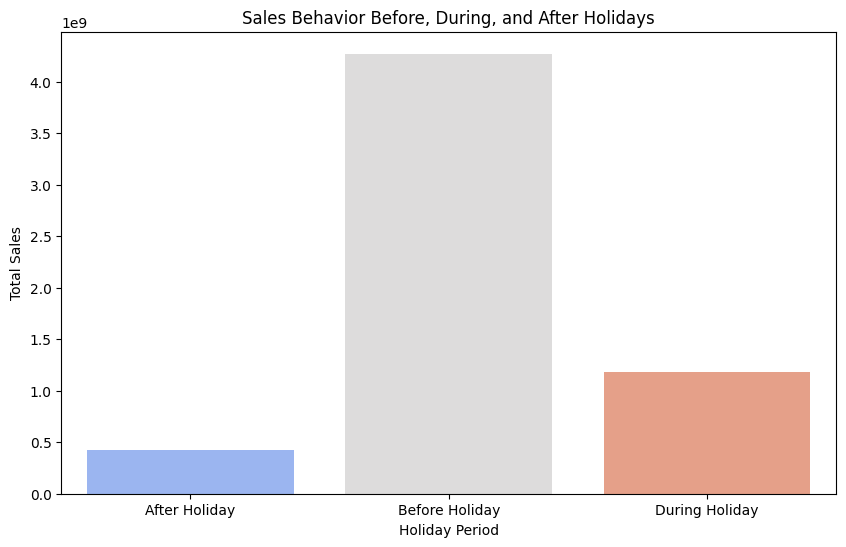

In [8]:
bda.create_a_holiday_period(train)

### i used a Rolling window approach to get the after holiday days 
#### and i take 2 days maximum for the after holiday 

#### this shows that we have this dat 
 #### Holidayperiod
- Before Holiday    758840
- During Holiday    197260
- After Holiday      61109

In [9]:
bda.ab_hypotesesi(train)

2024-09-20 10:18:56,615 - root - INFO - performing the ab hypotesis test over the before during and after holiday sales distribution


ANOVA Test Statistic: 3468.5431665264337
P-Value: 0.0
There is a significant difference in sales behavior across the holiday periods. which in before , During and after Holiday 


### while the p_value for the a/b hypotesis we can conclude that thre is a significance differnce in sales behaviour since p_value < 0.5 

## Find out any seasonal (Christmas, Easter, etc) purchase behaviors,

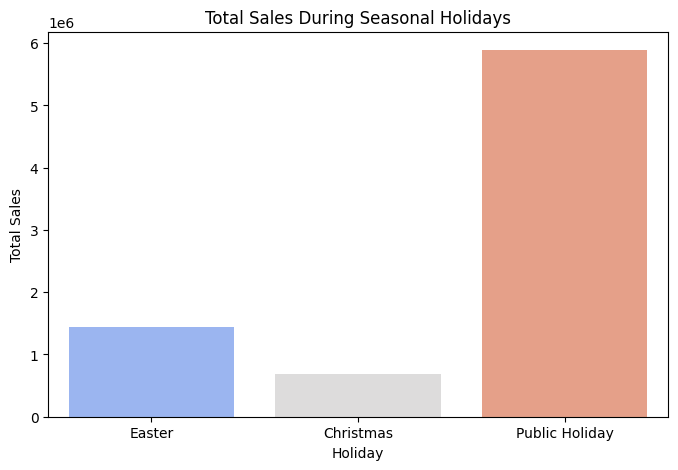

ANOVA Test Statistic: 10.212241988095077
P-Value: 3.684154668871422e-05
There is a significant difference in sales behavior across the ester christmas and public holidays 


In [10]:
bda.seasonal_holiday_behaviour(train)

### since the p_value 3.684154668871422×10−05 =0.00003684154668871422 There is a significant difference in sales behavior across the ester christmas and public holidays 
 - public holiday have a greatest sales it might implay that there is a riligious diversity

## What can you say about the correlation between sales and the number of customers?

2024-09-20 10:18:57,918 - root - INFO - performing the correlation between the number of customers and sales


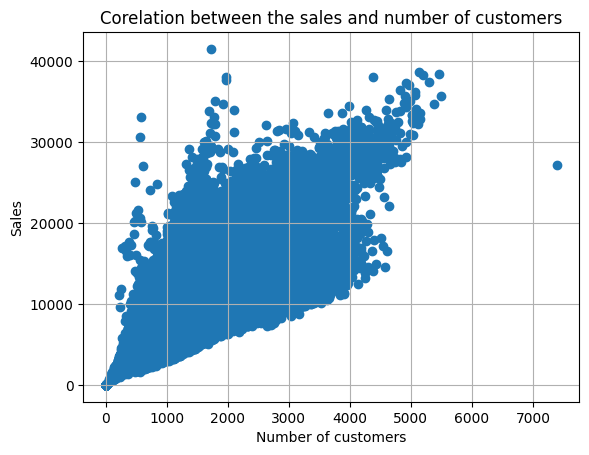

In [11]:
bda.corelation_sales_vs_no_of_customers(train)

#### Possible Reasons for the Outlier:
- Customer Behavior: Maybe a lot of customers came in, but they didn’t spend as much, leading to only moderate sales.
- Pricing or Promotions: There could have been a promotion that brought many customers, but the sales didn’t grow        proportionally due to discounted prices.
- Data Entry Error: It’s also possible that the number of customers was recorded incorrectly.
- Operational Constraints: The café or store may have reached a point of saturation where additional customers didn’t contribute significantly to sales, possibly due to limited stock or service capacity.

### so i will analyze it with promotion 

In [12]:
train[train['Customers'] > 6000]

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Holidayperiod
993496,993496,817,2,2013-01-22,27190,7388,1,1,0,0,Before Holiday


## How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

2024-09-20 10:19:00,807 - root - INFO - The impact of promotion on the number of customers and sales
2024-09-20 10:19:01,037 - root - INFO - Visualizing the impact of promotion on number of customers and sales


Average customers during promotion days: 820.0988146773861
Average customers during non-promotion days: 517.8235417537579
Average sales during promotion days: 7991.152045969903
Average sales during non-promotion days: 4406.050805160786


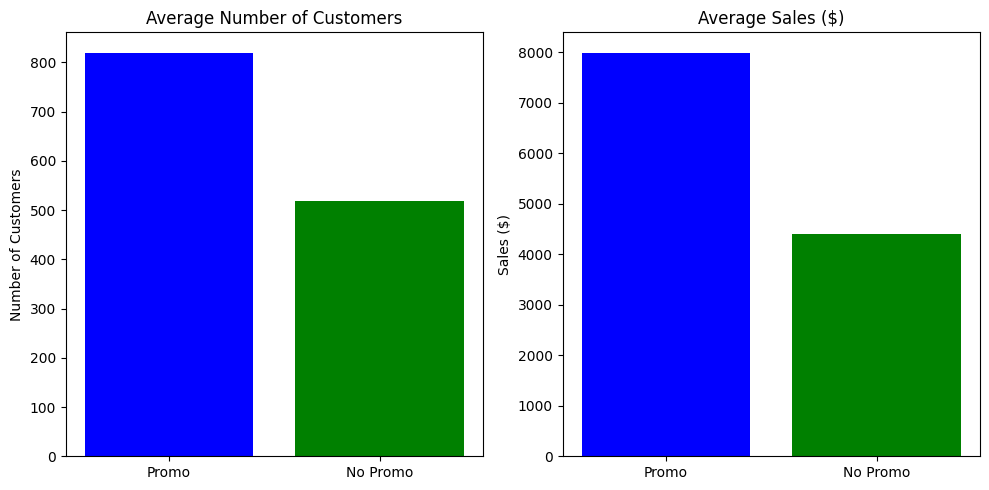

2024-09-20 10:19:01,337 - root - INFO - Impact of promotion on existing customers


Sales per customer during promotion days: 9.744133149507716
Sales per customer during non-promotion days: 8.50878812932767


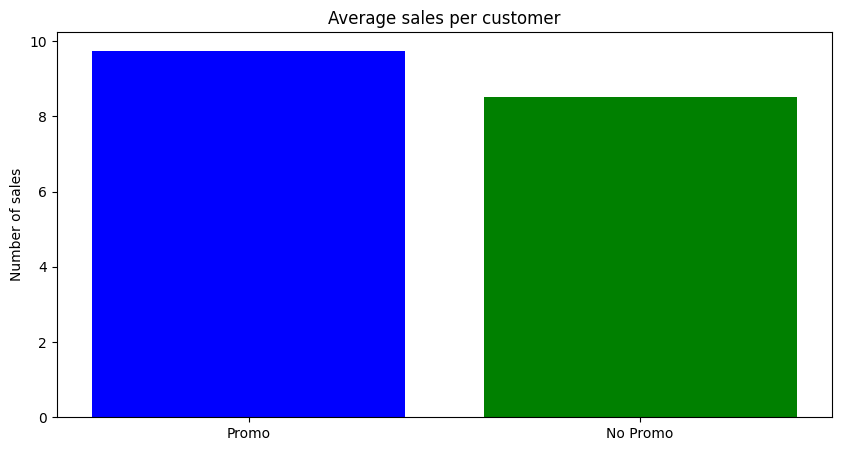

In [13]:
bda.impact_of_promotion_on_number_of_customers_and_sales(train)

### from this we can conclude that 
- During promotion both number of customers and sales increas
- and the exisiting customers also buy when there is promotion

## Time Series Analysis

In [14]:
train_data = sa.set_date_index(train)
train_data

2024-09-20 10:19:01,716 - root - INFO - changing the date column to standaed date time format
2024-09-20 10:19:01,844 - root - INFO - making the date column the index of the data frame


,Unnamed: 0,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Holidayperiod
Date,,,,,,,,,,
2015-07-31,0,1,5,5263,555,1,1,0,1,During Holiday
2015-07-31,1,2,5,6064,625,1,1,0,1,During Holiday
2015-07-31,2,3,5,8314,821,1,1,0,1,During Holiday
2015-07-31,3,4,5,13995,1498,1,1,0,1,During Holiday
2015-07-31,4,5,5,4822,559,1,1,0,1,During Holiday
...,...,...,...,...,...,...,...,...,...,...
2013-01-01,1017204,1111,2,0,0,0,0,a,1,During Holiday
2013-01-01,1017205,1112,2,0,0,0,0,a,1,During Holiday
2013-01-01,1017206,1113,2,0,0,0,0,a,1,During Holiday


2024-09-20 10:19:01,869 - root - INFO - Plotting weekly sales ...


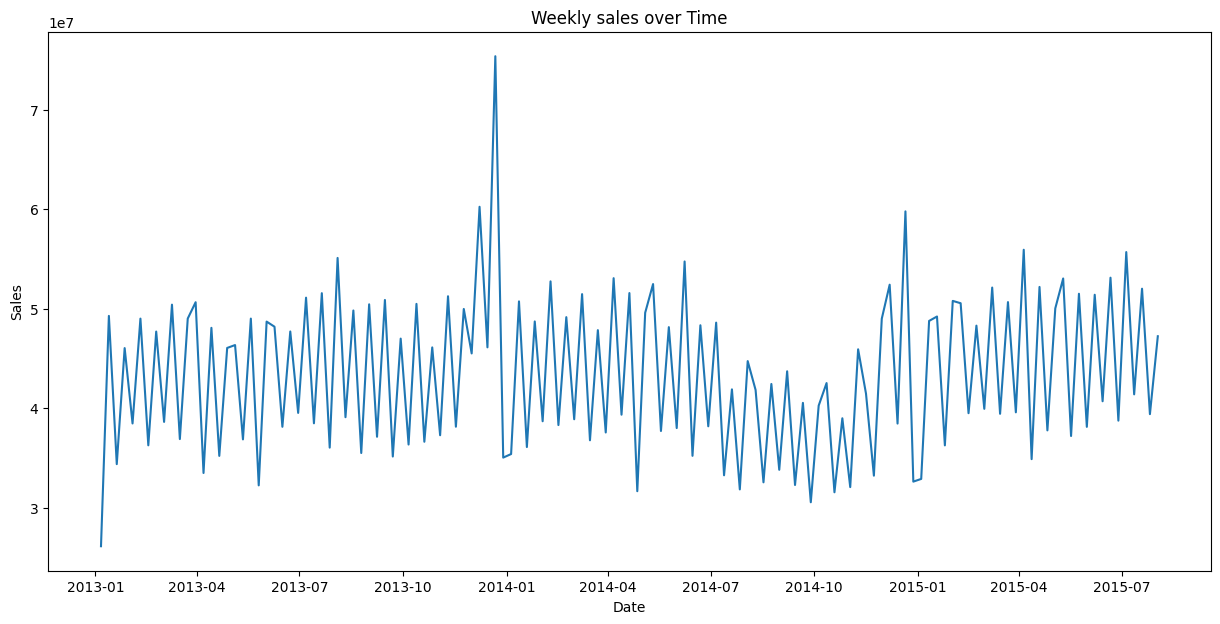

In [15]:
sa.plot_weekly_sales(train_data)